Importing Packages

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 8.0MB/s 


In [ ]:
import pandas as pd
import nltk
nltk.download('stopwords')
  
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import re
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_train = pd.read_csv("/content/Corona_NLP_train.csv",encoding = "ISO-8859-1")
df_test = pd.read_csv("/content/Corona_NLP_test.csv")

In [ ]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


Analysing data

In [ ]:
df_train["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [ ]:
corpus = []
stemmer = PorterStemmer() 
for i in range(len(df_train)):
    review = re.sub('[^a-zA-Z]'," ",df_train["OriginalTweet"][i])
    review = review.lower()
    review = review.split()
    review = [stemmer.stem(word) for word in review if word.lower() not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[1:10]

['advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account poss adequ suppli regular med order',
 'coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak http co binca vp p',
 'food stock one empti pleas panic enough food everyon take need stay calm stay safe covid franc covid covid coronaviru confin confinementot confinementgener http co zrlg z j',
 'readi go supermarket covid outbreak paranoid food stock litterali empti coronaviru seriou thing pleas panic caus shortag coronavirusfr restezchezv stayathom confin http co usmualq n',
 'news region first confirm covid case came sullivan counti last week peopl flock area store purchas clean suppli hand sanit food toilet paper good tim dodson report http co cfxch lu',
 'cashier groceri store share insight covid prove credibl comment civic class know talk http co iefdnehgdo',
 'supermarket today buy toilet paper rebel toiletpaper

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(corpus).toarray()

In [ ]:
def ordinal_encoding(df,col,mapping):
    ordinal_encoder = ce.OrdinalEncoder(cols = [col],return_df = True,mapping = [{'col':col,'mapping':mapping}])
    df_final = ordinal_encoder.fit_transform(df)
    return df_final

Data Overview

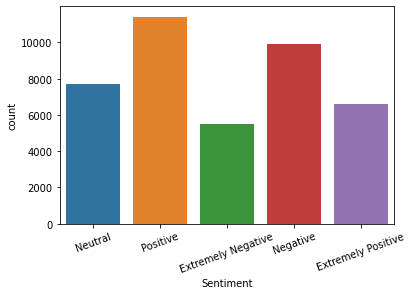

In [ ]:
plot = sns.countplot(x='Sentiment', data=df_train).set_xticklabels(labels=['Neutral', 'Positive', 'Extremely Negative', 'Negative','Extremely Positive'],rotation=20)


In [ ]:
dict = {'Neutral':3, 'Positive':2, 'Extremely Negative':5, 'Negative':4,
       'Extremely Positive':1}

In [ ]:
df_train_final = ordinal_encoding(df_train,"Sentiment",dict)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
def minimize_categories(val):
    if val == 1 or val == 2:
        return 1
    elif val == 3:
        return 2
    elif val == 4 or val == 5:
        return 3

In [ ]:
df_train_final["Sentiment"] = df_train_final["Sentiment"].apply(minimize_categories)

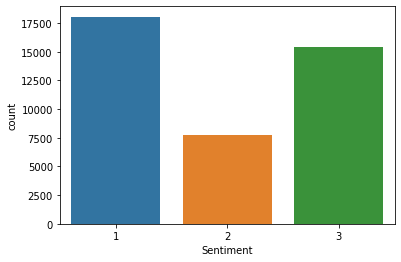

In [ ]:
sns.countplot(x='Sentiment', data=df_train_final)

Data visualisation 

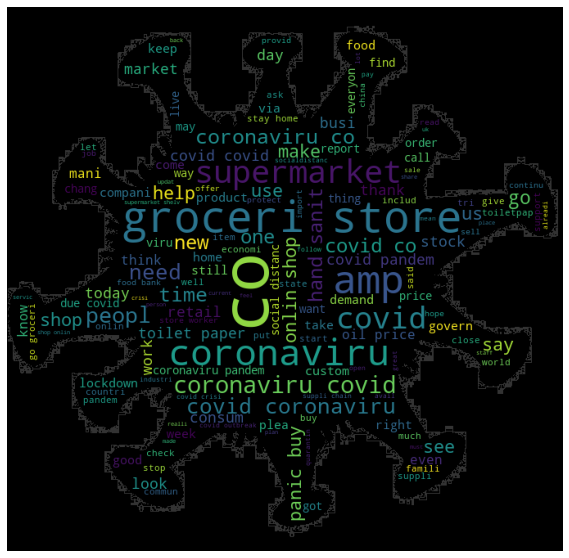

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
import requests
import io
response = requests.get("https://res.cloudinary.com/maxie/image/upload/v1617197755/TEMP/covid_ywd7ph.jpg")
image_bytes = io.BytesIO(response. content)
dataset = " ".join(corpus)
def create_word_cloud(string):

    maskArray = npy.array(Image.open(image_bytes))
    cloud = WordCloud(background_color = "black", max_words = 150, mask = maskArray, stopwords = set(STOPWORDS),contour_width=1, contour_color='#333')
    cloud.generate(string)
#     cloud.to_file("wordCloud.png")
    return cloud
dataset = dataset.lower()
wordcloud=create_word_cloud(dataset)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

In [ ]:
Y = df_train_final["Sentiment"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state= 0,stratify =Y)

Training models

In [ ]:
multinb = MultinomialNB()
multinb.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
Y_pred_multinb = multinb.predict(X_test)

In [ ]:
log = LogisticRegression()
log.fit(X_train,Y_train)
Y_pred_log = log.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Evaluation

In [ ]:
accuracy_score(Y_pred_multinb,Y_test)

0.6638726919339164

In [ ]:
print(classification_report(Y_pred_multinb,Y_test))

              precision    recall  f1-score   support

           1       0.84      0.64      0.72      4760
           2       0.18      0.70      0.28       394
           3       0.70      0.70      0.70      3078

    accuracy                           0.66      8232
   macro avg       0.57      0.68      0.57      8232
weighted avg       0.76      0.66      0.69      8232



In [ ]:
accuracy_score(Y_pred_log,Y_test)

0.7927599611273081

In [ ]:
print(classification_report(Y_pred_log,Y_test))

              precision    recall  f1-score   support

           1       0.84      0.81      0.83      3735
           2       0.64      0.73      0.68      1350
           3       0.81      0.79      0.80      3147

    accuracy                           0.79      8232
   macro avg       0.76      0.78      0.77      8232
weighted avg       0.80      0.79      0.79      8232



In [ ]:
# predict(text)
text = "T 3590 -I have tested CoviD positive ..  shifted to Hospital  .. hospital informing  authorities .. family and staff undergone tests , results awaited ..All that have been in close proximity to me in the last 10 days are requested to please get themselves tested !"


In [ ]:
def preprocess_text(text):
    corpus = []
    stemmer = PorterStemmer()
    review = re.sub('[^a-zA-Z]'," ",text)
    review = review.lower()
    review = review.split()
    review = [stemmer.stem(word) for word in review if word.lower() not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    return corpus

In [ ]:
corpus = preprocess_text(text)
X = tfidf.transform(corpus).toarray()
prediction = log.predict(X)[0]
if prediction == 1:
    print("Your Tweet is Negative")
elif prediction == 2:
    print("Your Tweet is Neutral")
elif prediction == 3:
    print("your Tweet is Positive")

Your Tweet is Negative


In [ ]:
pickle.dump(log,open("model_tweet.pkl","wb"))
pickle.dump(tfidf,open("tfidf_tweet.pkl","wb"))